In [154]:
# === Hybrid Transformer-LSTM for Forex Forecasting ===
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [155]:
# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Using device: {device}")



✅ Using device: cuda


In [156]:
# === Parameters ===
symbols = ['USDJPY=X', 'EURUSD=X', 'GBPUSD=X']
clean_names = ['USDJPY', 'EURUSD', 'GBPUSD']
features = [
    'Close', 'MA10', 'MA50', 'EMA10', 'EMA50', 'STD20',
    'Bollinger_Width', 'RSI', 'MOM', 'MACD', 'ATR'
]

# === Feature Engineering ===
def compute_features(data):
    data['MA10'] = data['Close'].rolling(10).mean()
    data['MA50'] = data['Close'].rolling(50).mean()
    data['EMA10'] = data['Close'].ewm(span=10).mean()
    data['EMA50'] = data['Close'].ewm(span=50).mean()
    data['STD20'] = data['Close'].rolling(20).std()
    data['Bollinger_High'] = data['MA10'] + 2 * data['STD20']
    data['Bollinger_Low'] = data['MA10'] - 2 * data['STD20']
    data['Bollinger_Width'] = data['Bollinger_High'] - data['Bollinger_Low']
    pct_change = data['Close'].pct_change()
    data['RSI'] = 100 - (100 / (1 + pct_change.rolling(14).mean() / pct_change.rolling(14).std()))
    data['MOM'] = data['Close'].diff(10)
    data['MACD'] = data['Close'].ewm(span=12).mean() - data['Close'].ewm(span=26).mean()
    high_low = data['High'] - data['Low']
    high_close = np.abs(data['High'] - data['Close'].shift())
    low_close = np.abs(data['Low'] - data['Close'].shift())
    tr = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
    data['ATR'] = tr.rolling(14).mean()
    return data[features].dropna()

fx_data = {s: compute_features(yf.download(s, period="10y", interval="1d")) for s in symbols}
min_len = min(len(df) for df in fx_data.values())
aligned = [fx_data[s][-min_len:].to_numpy() for s in symbols]
fx_combined = np.stack(aligned, axis=1).transpose(1, 0, 2)
df_dict = {name: pd.DataFrame(fx_combined[i], columns=features) for i, name in enumerate(clean_names)}
print("✅ Data loaded and processed.")

/tmp/ipykernel_7093/3254113941.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  fx_data = {s: compute_features(yf.download(s, period="10y", interval="1d")) for s in symbols}
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_7093/3254113941.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  fx_data = {s: compute_features(yf.download(s, period="10y", interval="1d")) for s in symbols}
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_7093/3254113941.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  fx_data = {s: compute_features(yf.download(s, period="10y", interval="1d")) for s in symbols}
[*********************100%***********************]  1 of 1 completed

✅ Data loaded and processed.



🚀 Training USDJPY
Epoch 0: Loss = 0.01550, Accuracy = 0.2533
Epoch 5: Loss = 0.00062, Accuracy = 0.6409
Epoch 10: Loss = 0.00047, Accuracy = 0.6830
Epoch 15: Loss = 0.00045, Accuracy = 0.7002
Epoch 20: Loss = 0.00036, Accuracy = 0.7503
Epoch 25: Loss = 0.00033, Accuracy = 0.7844
Epoch 30: Loss = 0.00029, Accuracy = 0.7896
Epoch 35: Loss = 0.00027, Accuracy = 0.8028
Epoch 40: Loss = 0.00029, Accuracy = 0.7924
Epoch 45: Loss = 0.00024, Accuracy = 0.8281
Epoch 50: Loss = 0.00023, Accuracy = 0.8409
Epoch 55: Loss = 0.00024, Accuracy = 0.8253
Epoch 60: Loss = 0.00027, Accuracy = 0.8024
Epoch 65: Loss = 0.00025, Accuracy = 0.8152
Epoch 70: Loss = 0.00022, Accuracy = 0.8493
Epoch 75: Loss = 0.00029, Accuracy = 0.7876
Epoch 80: Loss = 0.00023, Accuracy = 0.8409
Epoch 85: Loss = 0.00022, Accuracy = 0.8401
Epoch 90: Loss = 0.00021, Accuracy = 0.8481
Epoch 95: Loss = 0.00022, Accuracy = 0.8381


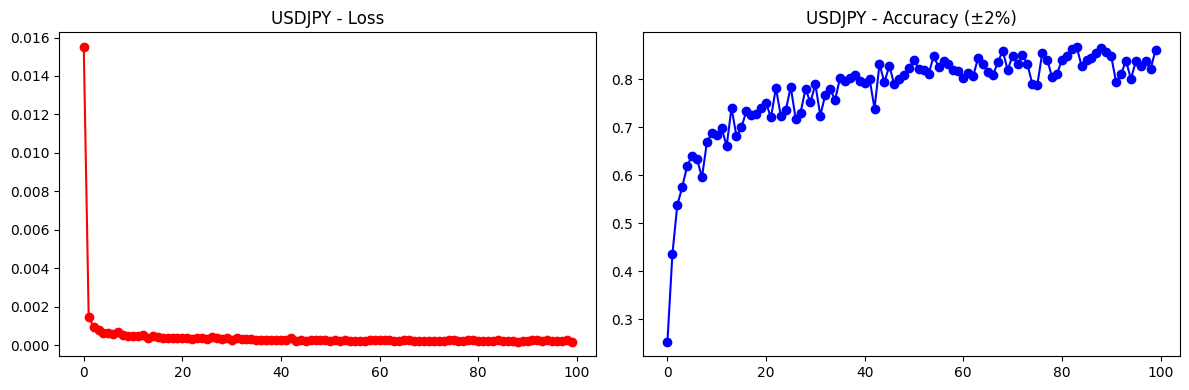


🚀 Training EURUSD
Epoch 0: Loss = 0.01649, Accuracy = 0.2080
Epoch 5: Loss = 0.00098, Accuracy = 0.4910
Epoch 10: Loss = 0.00087, Accuracy = 0.5034
Epoch 15: Loss = 0.00061, Accuracy = 0.6096
Epoch 20: Loss = 0.00060, Accuracy = 0.6124
Epoch 25: Loss = 0.00063, Accuracy = 0.5984
Epoch 30: Loss = 0.00061, Accuracy = 0.6008
Epoch 35: Loss = 0.00061, Accuracy = 0.5968
Epoch 40: Loss = 0.00062, Accuracy = 0.5940
Epoch 45: Loss = 0.00046, Accuracy = 0.6762
Epoch 50: Loss = 0.00052, Accuracy = 0.6385
Epoch 55: Loss = 0.00045, Accuracy = 0.6693
Epoch 60: Loss = 0.00041, Accuracy = 0.6986
Epoch 65: Loss = 0.00042, Accuracy = 0.6910
Epoch 70: Loss = 0.00044, Accuracy = 0.6850
Epoch 75: Loss = 0.00042, Accuracy = 0.6910
Epoch 80: Loss = 0.00039, Accuracy = 0.7058
Epoch 85: Loss = 0.00040, Accuracy = 0.7010
Epoch 90: Loss = 0.00042, Accuracy = 0.6998
Epoch 95: Loss = 0.00038, Accuracy = 0.7214


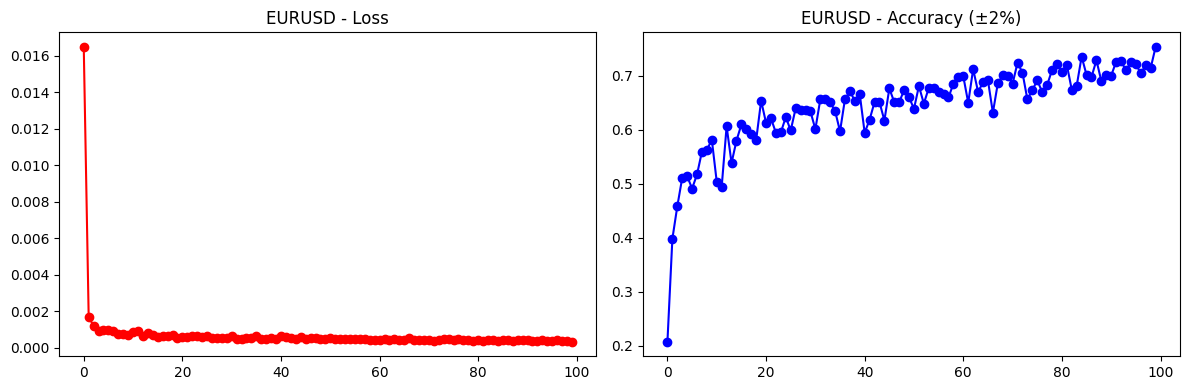


🚀 Training GBPUSD
Epoch 0: Loss = 0.01102, Accuracy = 0.2032
Epoch 5: Loss = 0.00088, Accuracy = 0.5311
Epoch 10: Loss = 0.00062, Accuracy = 0.6096
Epoch 15: Loss = 0.00052, Accuracy = 0.6665
Epoch 20: Loss = 0.00049, Accuracy = 0.6677
Epoch 25: Loss = 0.00040, Accuracy = 0.7122
Epoch 30: Loss = 0.00039, Accuracy = 0.7178
Epoch 35: Loss = 0.00041, Accuracy = 0.7006
Epoch 40: Loss = 0.00046, Accuracy = 0.6766
Epoch 45: Loss = 0.00034, Accuracy = 0.7455
Epoch 50: Loss = 0.00045, Accuracy = 0.6601
Epoch 55: Loss = 0.00035, Accuracy = 0.7479
Epoch 60: Loss = 0.00034, Accuracy = 0.7331
Epoch 65: Loss = 0.00034, Accuracy = 0.7523
Epoch 70: Loss = 0.00037, Accuracy = 0.7190
Epoch 75: Loss = 0.00030, Accuracy = 0.7768
Epoch 80: Loss = 0.00031, Accuracy = 0.7647
Epoch 85: Loss = 0.00036, Accuracy = 0.7146
Epoch 90: Loss = 0.00028, Accuracy = 0.7908
Epoch 95: Loss = 0.00029, Accuracy = 0.7872


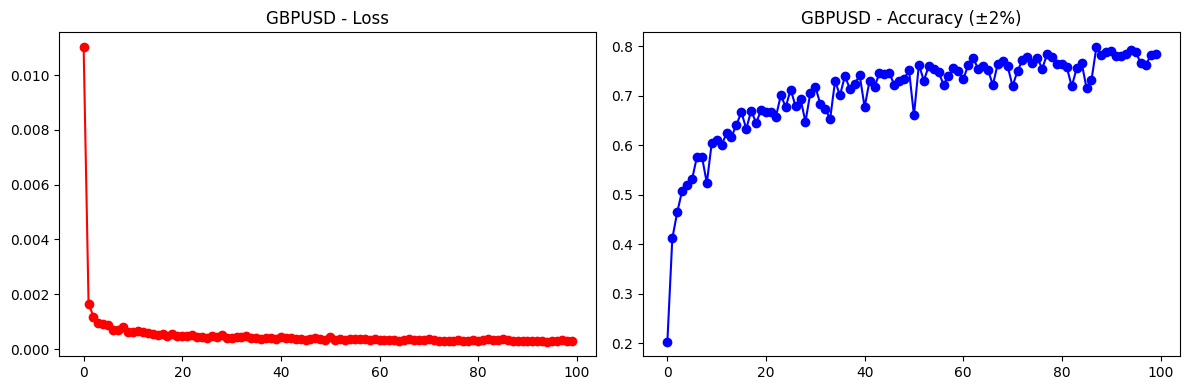

✅ All models trained and evaluated.


In [157]:
# === Hybrid Transformer-LSTM Model ===
class HybridModel(nn.Module):
    def __init__(self, input_dim, seq_len=60, d_model=64, nhead=4, num_layers=2):
        super().__init__()
        self.embedding = nn.Linear(input_dim, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.lstm = nn.LSTM(d_model, 32, batch_first=True)
        self.fc = nn.Linear(32, 1)

    def forward(self, x):
        x = self.embedding(x)
        x = self.transformer(x)
        _, (hn, _) = self.lstm(x)
        return self.fc(hn[-1])

def create_sequences(data, seq_len=60):
    X = np.array([data[i:i+seq_len] for i in range(len(data) - seq_len)])
    y = data[seq_len:, 0]  # Predict Close
    return X, y

# === Training ===
currency_models = {}
currency_scalers = {}
currency_predictions = {}

for pair in clean_names:
    print(f"\n🚀 Training {pair}")
    df = df_dict[pair].copy()
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df)

    X, y = create_sequences(scaled, seq_len=60)
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y[:, None], dtype=torch.float32)

    ds = TensorDataset(X_tensor, y_tensor)
    dl = DataLoader(ds, batch_size=64, shuffle=True)

    model = HybridModel(input_dim=scaled.shape[1]).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
    criterion = nn.MSELoss()

    train_losses, accuracies = [], []
    for epoch in range(100):
        model.train()
        epoch_loss, correct, total = 0, 0, 0
        for Xb, yb in dl:
            Xb, yb = Xb.to(device), yb.to(device)
            pred = model(Xb)
            loss = criterion(pred, yb)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

            with torch.no_grad():
                correct += ((torch.abs(pred - yb) < 0.02).sum()).item()
                total += yb.numel()

        acc = correct / total
        train_losses.append(epoch_loss / len(dl))
        accuracies.append(acc)
        if epoch % 5 == 0:
            print(f"Epoch {epoch}: Loss = {train_losses[-1]:.5f}, Accuracy = {acc:.4f}")

    # Plot
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, marker='o', color='red')
    plt.title(f"{pair} - Loss")
    plt.subplot(1, 2, 2)
    plt.plot(accuracies, marker='o', color='blue')
    plt.title(f"{pair} - Accuracy (±2%)")
    plt.tight_layout()
    plt.show()

    # Prediction
    model.eval()
    with torch.no_grad():
        pred_scaled = model(X_tensor.to(device)).cpu().numpy()
        y_tensor_np = y_tensor.numpy()

        # Pad back to 11-dim for inverse transform
        pad = lambda arr: np.concatenate([arr, np.zeros((arr.shape[0], len(features) - 1))], axis=1)
        actual = scaler.inverse_transform(pad(y_tensor_np))[:, 0]
        predicted = scaler.inverse_transform(pad(pred_scaled))[:, 0]

    currency_models[pair] = model
    currency_scalers[pair] = scaler
    currency_predictions[pair] = (actual, predicted)

print("✅ All models trained and evaluated.")

USDJPY: RMSE = 0.9413, MAE = 0.7062


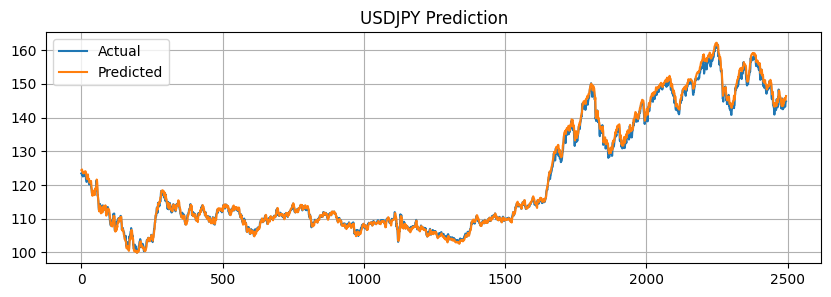

EURUSD: RMSE = 0.0052, MAE = 0.0040


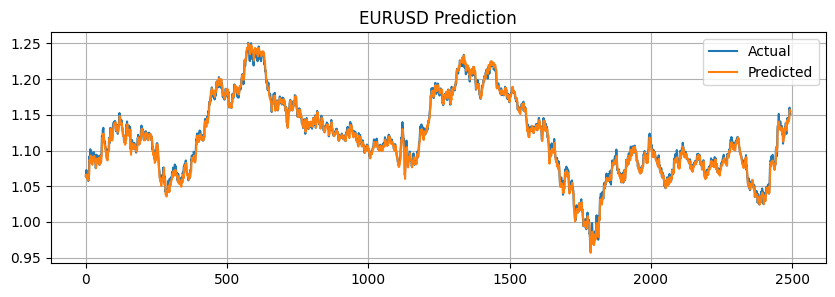

GBPUSD: RMSE = 0.0076, MAE = 0.0058


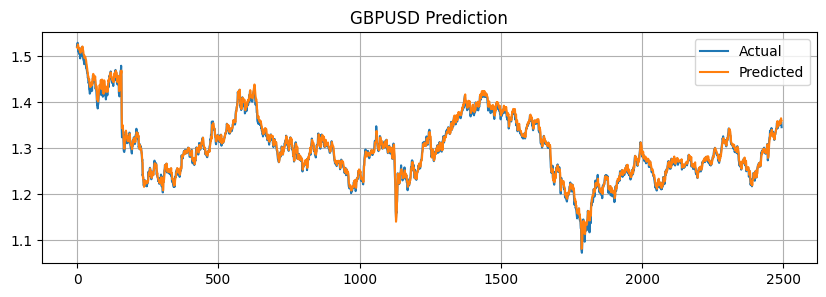

In [158]:
# === Evaluation ===
for pair in clean_names:
    actual, pred = currency_predictions[pair]
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    print(f"{pair}: RMSE = {rmse:.4f}, MAE = {mae:.4f}")
    plt.figure(figsize=(10, 3))
    plt.plot(actual, label='Actual')
    plt.plot(pred, label='Predicted')
    plt.title(f"{pair} Prediction")
    plt.legend()
    plt.grid(True)
    plt.show()

In [159]:
# === Trading Simulation with Hybrid Transformer ===

def trading_decision(prev_price, predicted_price, threshold=0.002):
    change = (predicted_price - prev_price) / prev_price
    if change > threshold:
        return "LONG"
    elif change < -threshold:
        return "SHORT"
    return "HOLD"

initial_capital = 1000.0
margin_per_trade = 10.0
leverage = 5
liq_threshold = 0.3

capital = {k: initial_capital for k in clean_names}
position = {k: 0 for k in clean_names}
entry_price = {k: 0 for k in clean_names}

print("\n=== 🔁 Starting 90-Day Backtest Simulation ===")
seq_len = 60
start_day = len(df_dict[clean_names[0]]) - 120
end_day = len(df_dict[clean_names[0]]) - 30

for t in range(start_day, end_day):
    print(f"\n📅 Day {t - start_day + 1}")
    for pair in clean_names:
        df = df_dict[pair]
        model = currency_models[pair]
        scaler = currency_scalers[pair]

        # Ensure enough data
        if t < seq_len:
            continue

        window_data = df.iloc[t - seq_len:t].values
        scaled_input = scaler.transform(window_data)
        input_tensor = torch.tensor(scaled_input.reshape(1, seq_len, -1), dtype=torch.float32).to(device)

        model.eval()
        with torch.no_grad():
            pred_scaled = model(input_tensor).cpu().item()
            # Reconstruct prediction into full feature vector to inverse transform
            padded = np.array([[pred_scaled] + [0] * (scaled_input.shape[1] - 1)])
            pred_price = scaler.inverse_transform(padded)[0][0]

        actual_price = df.iloc[t]['Close']
        action = trading_decision(actual_price, pred_price)

        if position[pair] == 0:
            if action == "LONG":
                position[pair] = 10
                entry_price[pair] = actual_price
                print(f"🟢 {pair}: ENTER LONG at {actual_price:.4f}")
            elif action == "SHORT":
                position[pair] = -10
                entry_price[pair] = actual_price
                print(f"🔴 {pair}: ENTER SHORT at {actual_price:.4f}")
        else:
            pnl = position[pair] * (actual_price - entry_price[pair]) * leverage * margin_per_trade / actual_price
            equity = capital[pair] + pnl
            if equity / (margin_per_trade * abs(position[pair])) < liq_threshold:
                print(f"⚠️ {pair}: Liquidation at {actual_price:.4f} | PnL = {pnl:.2f}")
                capital[pair] = equity
                position[pair] = 0
                entry_price[pair] = 0
            elif abs(pnl) > 50:
                print(f"💰 {pair}: Exit trade at {actual_price:.4f} | PnL = {pnl:.2f}")
                capital[pair] += pnl
                position[pair] = 0
                entry_price[pair] = 0

        print(f"{pair} ➤ Action: {action} | Capital: ${capital[pair]:.2f} | Position: {position[pair]}")





=== 🔁 Starting 90-Day Backtest Simulation ===

📅 Day 1
🟢 USDJPY: ENTER LONG at 157.8730
USDJPY ➤ Action: LONG | Capital: $1000.00 | Position: 10
🔴 EURUSD: ENTER SHORT at 1.0429
EURUSD ➤ Action: SHORT | Capital: $1000.00 | Position: -10
🔴 GBPUSD: ENTER SHORT at 1.2579
GBPUSD ➤ Action: SHORT | Capital: $1000.00 | Position: -10

📅 Day 2
USDJPY ➤ Action: LONG | Capital: $1000.00 | Position: 10
EURUSD ➤ Action: SHORT | Capital: $1000.00 | Position: -10
GBPUSD ➤ Action: LONG | Capital: $1000.00 | Position: -10

📅 Day 3
USDJPY ➤ Action: LONG | Capital: $1000.00 | Position: 10
EURUSD ➤ Action: HOLD | Capital: $1000.00 | Position: -10
GBPUSD ➤ Action: LONG | Capital: $1000.00 | Position: -10

📅 Day 4
USDJPY ➤ Action: LONG | Capital: $1000.00 | Position: 10
EURUSD ➤ Action: LONG | Capital: $1000.00 | Position: -10
GBPUSD ➤ Action: LONG | Capital: $1000.00 | Position: -10

📅 Day 5
USDJPY ➤ Action: LONG | Capital: $1000.00 | Position: 10
EURUSD ➤ Action: SHORT | Capital: $1000.00 | Position: -10


/home/sibo/miniconda3/envs/mL/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/sibo/miniconda3/envs/mL/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/sibo/miniconda3/envs/mL/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/sibo/miniconda3/envs/mL/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/sibo/miniconda3/envs/mL/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted w

USDJPY ➤ Action: LONG | Capital: $1000.00 | Position: 10
EURUSD ➤ Action: SHORT | Capital: $1000.00 | Position: -10
GBPUSD ➤ Action: SHORT | Capital: $1000.00 | Position: -10

📅 Day 29
USDJPY ➤ Action: LONG | Capital: $1000.00 | Position: 10
EURUSD ➤ Action: HOLD | Capital: $1000.00 | Position: -10
GBPUSD ➤ Action: LONG | Capital: $1000.00 | Position: -10

📅 Day 30
USDJPY ➤ Action: LONG | Capital: $1000.00 | Position: 10
EURUSD ➤ Action: LONG | Capital: $1000.00 | Position: -10
GBPUSD ➤ Action: LONG | Capital: $1000.00 | Position: -10

📅 Day 31
USDJPY ➤ Action: LONG | Capital: $1000.00 | Position: 10
EURUSD ➤ Action: HOLD | Capital: $1000.00 | Position: -10
GBPUSD ➤ Action: LONG | Capital: $1000.00 | Position: -10

📅 Day 32
USDJPY ➤ Action: LONG | Capital: $1000.00 | Position: 10
EURUSD ➤ Action: SHORT | Capital: $1000.00 | Position: -10
GBPUSD ➤ Action: SHORT | Capital: $1000.00 | Position: -10

📅 Day 33
USDJPY ➤ Action: SHORT | Capital: $1000.00 | Position: 10
EURUSD ➤ Action: SHORT 

/home/sibo/miniconda3/envs/mL/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/sibo/miniconda3/envs/mL/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/sibo/miniconda3/envs/mL/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/sibo/miniconda3/envs/mL/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/sibo/miniconda3/envs/mL/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted w

EURUSD ➤ Action: SHORT | Capital: $1000.00 | Position: -10
GBPUSD ➤ Action: HOLD | Capital: $1000.00 | Position: -10

📅 Day 57
USDJPY ➤ Action: HOLD | Capital: $1000.00 | Position: 10
EURUSD ➤ Action: SHORT | Capital: $1000.00 | Position: -10
GBPUSD ➤ Action: HOLD | Capital: $1000.00 | Position: -10

📅 Day 58
USDJPY ➤ Action: LONG | Capital: $1000.00 | Position: 10
EURUSD ➤ Action: SHORT | Capital: $1000.00 | Position: -10
GBPUSD ➤ Action: HOLD | Capital: $1000.00 | Position: -10

📅 Day 59
USDJPY ➤ Action: LONG | Capital: $1000.00 | Position: 10
EURUSD ➤ Action: SHORT | Capital: $1000.00 | Position: -10
GBPUSD ➤ Action: HOLD | Capital: $1000.00 | Position: -10

📅 Day 60
USDJPY ➤ Action: SHORT | Capital: $1000.00 | Position: 10
EURUSD ➤ Action: SHORT | Capital: $1000.00 | Position: -10
GBPUSD ➤ Action: LONG | Capital: $1000.00 | Position: -10

📅 Day 61
USDJPY ➤ Action: SHORT | Capital: $1000.00 | Position: 10
EURUSD ➤ Action: HOLD | Capital: $1000.00 | Position: -10
GBPUSD ➤ Action: HOL

/home/sibo/miniconda3/envs/mL/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/sibo/miniconda3/envs/mL/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/sibo/miniconda3/envs/mL/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/sibo/miniconda3/envs/mL/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/sibo/miniconda3/envs/mL/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted w

USDJPY ➤ Action: LONG | Capital: $948.85 | Position: 10
EURUSD ➤ Action: SHORT | Capital: $1000.00 | Position: -10
GBPUSD ➤ Action: HOLD | Capital: $1000.00 | Position: -10

📅 Day 86
USDJPY ➤ Action: LONG | Capital: $948.85 | Position: 10
EURUSD ➤ Action: HOLD | Capital: $1000.00 | Position: -10
GBPUSD ➤ Action: LONG | Capital: $1000.00 | Position: -10

📅 Day 87
USDJPY ➤ Action: SHORT | Capital: $948.85 | Position: 10
EURUSD ➤ Action: HOLD | Capital: $1000.00 | Position: -10
GBPUSD ➤ Action: HOLD | Capital: $1000.00 | Position: -10

📅 Day 88
USDJPY ➤ Action: LONG | Capital: $948.85 | Position: 10
EURUSD ➤ Action: SHORT | Capital: $1000.00 | Position: -10
GBPUSD ➤ Action: HOLD | Capital: $1000.00 | Position: -10

📅 Day 89
USDJPY ➤ Action: LONG | Capital: $948.85 | Position: 10
EURUSD ➤ Action: HOLD | Capital: $1000.00 | Position: -10
GBPUSD ➤ Action: SHORT | Capital: $1000.00 | Position: -10

📅 Day 90
USDJPY ➤ Action: LONG | Capital: $948.85 | Position: 10
EURUSD ➤ Action: SHORT | Capit

/home/sibo/miniconda3/envs/mL/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/sibo/miniconda3/envs/mL/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/sibo/miniconda3/envs/mL/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/sibo/miniconda3/envs/mL/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/sibo/miniconda3/envs/mL/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted w

In [160]:
# === ROI Report ===
print("\n📊 === Final ROI Report ===")
total_initial = len(clean_names) * initial_capital
total_final = sum(capital.values())

for pair in clean_names:
    pnl = capital[pair] - initial_capital
    print(f"{pair}: Final = ${capital[pair]:.2f} | PnL = ${pnl:.2f}")

roi = (total_final / total_initial - 1) * 100
print(f"\nTotal ROI: {roi:.2f}%")
print("✅ Simulation Complete.")


📊 === Final ROI Report ===
USDJPY: Final = $948.85 | PnL = $-51.15
EURUSD: Final = $1000.00 | PnL = $0.00
GBPUSD: Final = $1000.00 | PnL = $0.00

Total ROI: -1.71%
✅ Simulation Complete.
